# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2024

# Week 7

# motivating Example: financial markets

Financial market example
=========================

Consider the state of a financial market from week to week. 

- by a *bull market* we mean a week of generally rising prices. 
- by a *bear market* we mean a week of generally declining prices.
- by a *recession* we mean a general slowdown of the economy.

Empirical observation shows for each of these three states what the probability of the state for the subsequent week, as follows:

|                  | *bull*   | *bear*   | *recession*| 
| :--------------- | -------: | -------: | ---------: |
|     followed by bull         | 0.90     | 0.15     | 0.25      |
|     followed by bear         | 0.075    | 0.80     | 0.25       |
|     followed by recession    | 0.025    | 0.05     | 0.50       |

In words, the first col indicates that if one has a bull market, then 90% of the time the next week is a bull market, 7.5% of the time the next week is a bear market, and 2.5% of the time the next week is in recession.

Probabilities
-------------

Let's number the weeks we are going to consider $k=0,1,2,...$.
We can represent the probability that week $k$ is a bull market, a bear market, or in recession using a vector in $\mathbb{R}^3$:

$$\mathbf{x}^{(k)} = \begin{bmatrix}
\text{bull market prob.} \\
\text{bear market prob.} \\
\text{recession prob.}
\end{bmatrix}
=\begin{bmatrix}
\alpha_k \\
\beta_k \\
\gamma_k
\end{bmatrix}$$

We'd like to describe the probabilities describing the next week -- i.e. the vector $\mathbf{x}^{(k+1)}$.

Observe that if we *knew for sure* that week $k$ was a bear market, then $\mathbf{x}^{(k)} = \mathbf{e}_1 = 
\begin{bmatrix} 
1 \\ 0 \\ 0 
\end{bmatrix}$.
But then we have more-or-less been told what $\mathbf{x}^{(k+1)}$ is -- it must be 
$$\mathbf{x}^{(k+1)} = \begin{bmatrix}
0.90\\
0.075 \\
0.025
\end{bmatrix}.$$

In the general case, we see if $\mathbf{x}^{(k)} = \begin{bmatrix}
\alpha_k \\
\beta_k \\
\gamma_k
\end{bmatrix}$, then
$$\mathbf{x}^{(k+1)} = \alpha_k \begin{bmatrix}
0.90\\
0.075 \\
0.025
\end{bmatrix} + 
\beta_k \begin{bmatrix}
0.15\\
0.8 \\
0.05
\end{bmatrix} +
\gamma_k \begin{bmatrix}
0.25\\
0.25 \\
0.5
\end{bmatrix} = A \cdot \begin{bmatrix} \alpha_k \\ \beta_k \\ \gamma_k \end{bmatrix} = A \cdot \mathbf{x}^{(k)}$$
where
$$A = \begin{bmatrix}
0.90 & 0.15 & 0.25 \\
0.075 & 0.80  & 0.25  \\
.025 & 0.05  & 0.50 
\end{bmatrix}$$

We want to enter $A$ as a matrix in ``python``, and use ``numpy`` functions 
to study the iterations.

Of course, with just three states this is fairly straightforward -- one just gets a $3 \times 3$ matrix. But with more variables, it might be nice to be more systematic. Let's describe how to use ``dictionaries`` in ``python`` to index the probabilities.

The idea is to make a list of the possible states; in this case

```
states = ["bull","bear","recess"]
```

and to use these states as the row/column index for the information in the resulting matrix.

So we just enter the matrix:

```
A = np.array([[0.90 , 0.15 , 0.25],
              [0.075, 0.80 , 0.25],
              [0.025, 0.05 , 0.50]])
```

and build the dictionary ``dict`` using the information in ``A``.

Note e.g. that if you wanted the entry in A corresponding to "bull then bear", you could do

``A[1,2]``

or

``A[states.index("bull"),states.index("bear")]``


In [1]:
import numpy as np

A = np.array([[0.90 , 0.15 , 0.25],
              [0.075, 0.80 , 0.25],
              [0.025, 0.05 , 0.50]])

states = ["bull","bear","recess"]

A[states.index("bull"),states.index("bear")]

np.float64(0.15)

Of course, writing

``A[states.index("bull"),states.index("bear")]``

is a bit clunky...

So let's create the dictionary I mentioned. A dictionary
is a collection of ``key/value`` pairs.

The *keys* to our dictionary will be pairs ("tuples")

``(a,b)`` where ``a,b`` are members of the list ``states``.

And the value associated to ``(a,b)`` will be the probability that state ``b`` follows state ``a``.

The dictionary will be named ``prob``, and we'll be able to the probability
that a bull market follows  a recession as follows:

``prob[("recess","bull")]``

To define ``dict``, we'll use:

```
{(a,b):A[states.index(a)][states.index(b)] for (a,b) in product(states,states)}
```

In [2]:
from itertools import product

prob = {(a,b):A[states.index(a)][states.index(b)] for (a,b) in product(states,states)}

prob


{('bull', 'bull'): np.float64(0.9),
 ('bull', 'bear'): np.float64(0.15),
 ('bull', 'recess'): np.float64(0.25),
 ('bear', 'bull'): np.float64(0.075),
 ('bear', 'bear'): np.float64(0.8),
 ('bear', 'recess'): np.float64(0.25),
 ('recess', 'bull'): np.float64(0.025),
 ('recess', 'bear'): np.float64(0.05),
 ('recess', 'recess'): np.float64(0.5)}

In [3]:
print("\n".join([f"week of {a:6} ---> week of {b:6}: {prob[(a,b)]}" for (a,b) in prob.keys()]))

week of bull   ---> week of bull  : 0.9
week of bull   ---> week of bear  : 0.15
week of bull   ---> week of recess: 0.25
week of bear   ---> week of bull  : 0.075
week of bear   ---> week of bear  : 0.8
week of bear   ---> week of recess: 0.25
week of recess ---> week of bull  : 0.025
week of recess ---> week of bear  : 0.05
week of recess ---> week of recess: 0.5


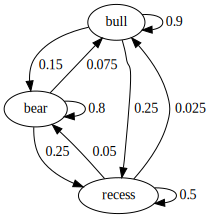

In [4]:
from graphviz import Digraph

fin = Digraph("financial")

## make the nodes
for a in states:
    fin.node(a)

## make and label the edges
for a,b in prob.keys():
    fin.edge(a,b,f"{prob[(a,b)]}")


fin

In [5]:
def sbv(index,size):
    return np.array([1.0 if i == index-1 else 0.0 for i in range(size)])

state_vector = {"bull":sbv(1,3),
                "bear":sbv(2,3),
                "recess":sbv(3,3)}

def state(bull=0,bear=0,recess=0):
    if np.abs(1 - (bull + bear + recess)) < 1e-7:
        return sum([bull*state_vector["bull"],
                    bear*state_vector["bear"],
                    recess*state_vector["recess"]],
                    np.zeros(3))
    else:
        raise Exception("Probabilities must add to 1")
        
[A @ state_vector["bull"],
 A @ state(bull=1),
 A @ state(bull=.5,bear=.5)]

[array([0.9  , 0.075, 0.025]),
 array([0.9  , 0.075, 0.025]),
 array([0.525 , 0.4375, 0.0375])]

**Q1**
======

If there is a bear market in week $k$, what probabilities describe the market state 3 weeks later (i.e. in week $k+3$)?

In [7]:
## we'll need to use the ``matrix_power`` function

from numpy.linalg import matrix_power

matrix_power(A,3) @ state(bear=1)


array([0.3575 , 0.56825, 0.07425])

**Q2**
------

Suppose that in we knew that there was a 50% chance of a recession and a 50% chance of a bear market.
What probabilities describe the market state 5 weeks later?



In [9]:
matrix_power(A,5) @ state(recess=.5,bear=.5)

array([0.51263 , 0.407445, 0.079925])

**Q3**
=======

Compute A^50. What do you observe? What about A^100?

Explain what seems to happen to the vector $A^j \cdot \mathbf{x}^{(0)}$ for large $j$.


In [11]:
matrix_power(A,100)

array([[0.625 , 0.625 , 0.625 ],
       [0.3125, 0.3125, 0.3125],
       [0.0625, 0.0625, 0.0625]])

**Q4**
======
In the long run, what do you think the probability of a bull market is? Does this probability depend on the starting state of the market?